In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


Found 1253 files belonging to 3 classes.
Class names: ['donkey', 'horse', 'zebra']


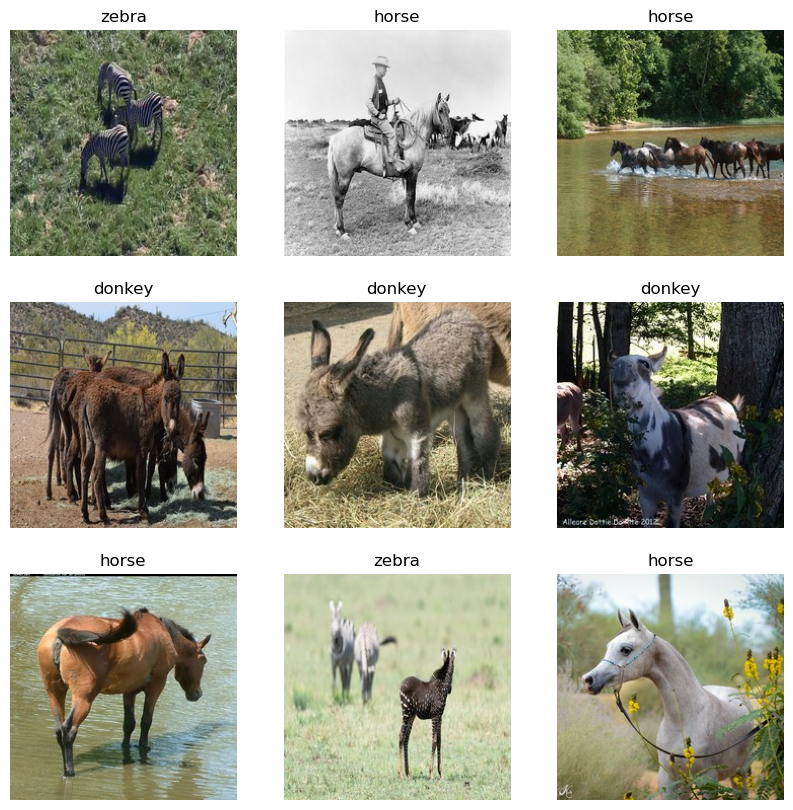

Epoch 1/10
40/40 [==============================] - 27s 624ms/step - loss: 1.1951 - accuracy: 0.4429
Epoch 2/10
40/40 [==============================] - 24s 599ms/step - loss: 0.6965 - accuracy: 0.6329
Epoch 3/10
40/40 [==============================] - 23s 584ms/step - loss: 0.6545 - accuracy: 0.6720
Epoch 4/10
40/40 [==============================] - 24s 592ms/step - loss: 0.5355 - accuracy: 0.7263
Epoch 5/10
40/40 [==============================] - 23s 586ms/step - loss: 0.3813 - accuracy: 0.8284
Epoch 6/10
40/40 [==============================] - 23s 585ms/step - loss: 0.2748 - accuracy: 0.8962
Epoch 7/10
40/40 [==============================] - 24s 598ms/step - loss: 0.1724 - accuracy: 0.9401
Epoch 8/10
40/40 [==============================] - 24s 590ms/step - loss: 0.0913 - accuracy: 0.9705
Epoch 9/10
40/40 [==============================] - 24s 589ms/step - loss: 0.0385 - accuracy: 0.9920
Epoch 10/10
40/40 [==============================] - 24s 591ms/step - loss: 0.0854 - accura

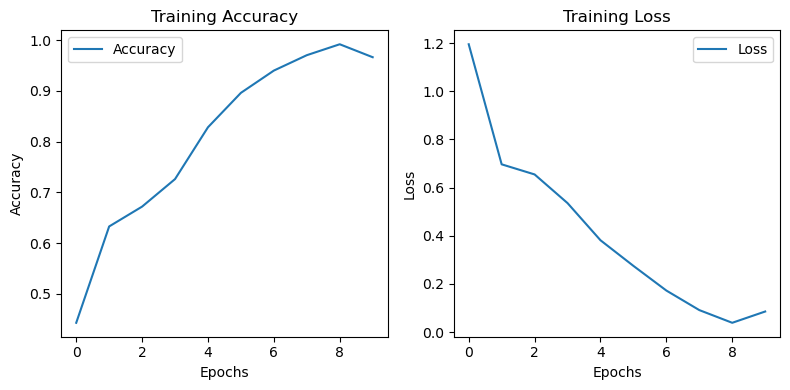

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Set up dataset parameters
img_height = 224  # Height of input images
img_width = 224   # Width of input images
batch_size = 32   # Number of images per batch

# Path to the dataset directory (parent folder of 'donkey', 'horse', 'zebra')
dataset_path = "donkey-horse-zebra"

# Step 2: Load the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True  # Shuffle the dataset
)

# Get class names (e.g., ['donkey', 'horse', 'zebra'])
class_names = train_dataset.class_names
print("Class names:", class_names)

# Step 3: Visualize some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take one batch of data
    for i in range(9):  # Show the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Step 4: Prepare the dataset for training
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Step 5: Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolution layer
    layers.MaxPooling2D(),                         # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Another convolution layer
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),                              # Flatten the data for dense layers
    layers.Dense(128, activation='relu'),          # Fully connected layer
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Step 6: Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)

# Step 7: Train the model
epochs = 10  # Number of training epochs
history = model.fit(train_dataset, epochs=epochs)

# Step 8: Save the model
model.save("animal_classifier.h5")
print("Model saved as 'animal_classifier.h5'")

# Step 9: Plot training accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Make Predictions
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch with one image

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()

    print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")

# Example prediction
# predict_image("path_to_your_test_image.jpg")


In [5]:
# Example prediction
predict_image("test/donkey (225).jpg")

1/1 [==============================] - 1s 566ms/step
Predicted class: donkey (Confidence: 1.00)


In [6]:
# Example prediction
predict_image("test/horse (323).jpg")

1/1 [==============================] - 0s 25ms/step
Predicted class: horse (Confidence: 1.00)


In [7]:
# Example prediction
predict_image("test/zebra (103).jpg")

1/1 [==============================] - 0s 33ms/step
Predicted class: zebra (Confidence: 1.00)
